# Project Statement : 

To predict whether Loan will be provided or not, using ML classification models.

# Business Goal :

To predict whether the Loan will be provided by the borrower/bank or not. It will be used by the management to understand how exactly the Loan Status vary with the independent variables like Gender, Married, Dependents, Education, Self_Employed	Applicant Income etc.  Further, the model will be a good way for management to decide their credit policy for existing and new customers.

# Importing required Libraries

In [ ]:
# Importing all the necessary libraries
import warnings
warnings.filterwarnings("ignore")

In [ ]:
mport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. tree import DecisionTreeClassifier

from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Reading and Understanding the data

In [70]:
df = pd.read_csv("Loan Status.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [72]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking Null Values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df1 = df.dropna()
df1.shape

(480, 13)

In [8]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

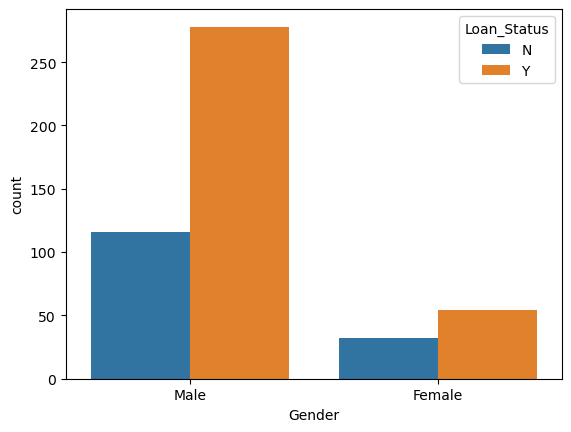

In [9]:
sns.countplot(data = df1, x= "Gender",hue='Loan_Status')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

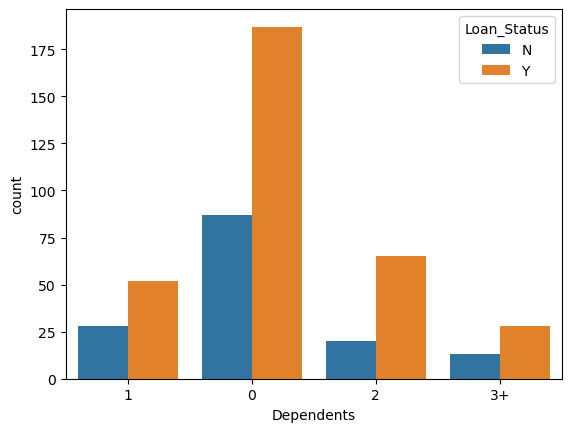

In [10]:
sns.countplot(data = df1, x= "Dependents",hue='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

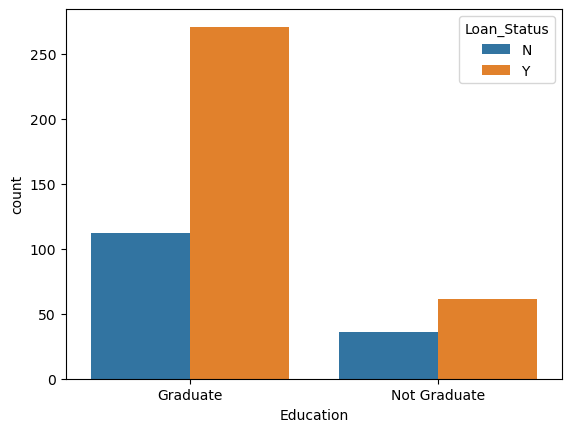

In [11]:
sns.countplot(data = df1, x= "Education",hue='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

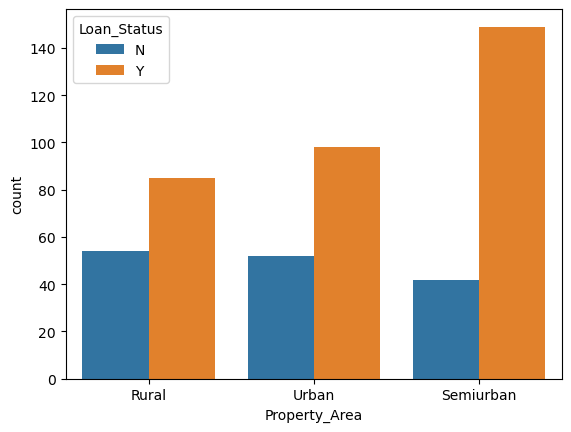

In [12]:
sns.countplot(data = df1, x= "Property_Area",hue='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

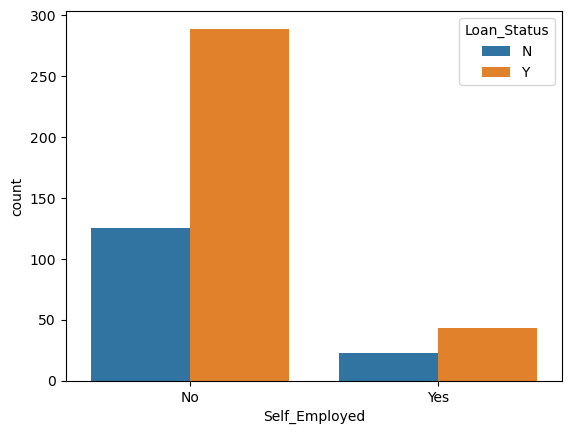

In [13]:
sns.countplot(data = df1, x= "Self_Employed",hue='Loan_Status')

# Data Preprocessing: Encoding and Transforming Variables

In [14]:
df1.replace({"Loan_Status":{"Y":1,"N":0}},inplace = True)

In [15]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [16]:
df1.replace({"Dependents":{"3+":4}},inplace = True)

In [17]:
df1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,4,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,1


# Converting Categorical columns to Numerical values

In [18]:
df1.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace = True)

In [19]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# Splitting the data

In [20]:
X = df1.drop(columns = ["Loan_ID","Loan_Status"],axis = 1)

In [21]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [22]:
y = df1["Loan_Status"]

In [23]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

# Train-test data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [26]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
122,0,0,0,1,0,2137,8980.0,137.0,360.0,0.0,1
498,1,1,1,1,1,2895,0.0,95.0,360.0,1.0,1
144,1,1,2,1,0,11757,0.0,187.0,180.0,1.0,2
217,1,1,0,1,0,3727,1775.0,131.0,360.0,1.0,1
362,1,1,0,1,0,4750,2333.0,130.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,0,1,0,3500,0.0,81.0,300.0,1.0,1
390,1,0,4,1,0,9167,0.0,185.0,360.0,1.0,0
76,1,0,0,1,0,3750,4750.0,176.0,360.0,1.0,2
286,0,0,0,1,1,2600,1717.0,99.0,300.0,1.0,1


In [27]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
368,1,1,1,1,0,6325,0.0,175.0,360.0,1.0,1
74,1,1,4,1,1,5266,1774.0,187.0,360.0,1.0,1
135,1,1,4,1,0,4000,7750.0,290.0,360.0,1.0,1
53,1,1,2,1,0,4616,0.0,134.0,360.0,1.0,2
96,0,1,0,1,0,2484,2302.0,137.0,360.0,1.0,1
388,1,1,0,1,0,2333,2417.0,136.0,360.0,1.0,2
345,1,1,0,1,0,2499,2458.0,160.0,360.0,1.0,1
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2
549,1,1,0,1,0,2785,2016.0,110.0,360.0,1.0,0
99,1,1,0,1,0,1759,3541.0,131.0,360.0,1.0,1


In [28]:
y_train

122    1
498    1
144    1
217    1
362    1
      ..
72     1
390    1
76     0
286    0
376    1
Name: Loan_Status, Length: 432, dtype: int64

In [29]:
y_test

368    1
74     1
135    0
53     0
96     1
388    1
345    1
8      1
549    1
99     1
49     1
513    0
43     1
92     1
555    1
609    1
221    1
454    1
607    1
179    0
277    1
488    1
150    0
585    0
168    0
267    1
543    1
520    1
22     0
69     0
91     1
250    0
416    0
154    1
415    1
291    0
253    1
97     1
393    1
399    0
537    1
15     1
469    0
371    1
300    0
189    1
224    1
201    1
Name: Loan_Status, dtype: int64

# Fitting various classification models and evaluating their performance metrics

# 1. KNN Classifier Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1], dtype=int64)

In [37]:
y_test

368    1
74     1
135    0
53     0
96     1
388    1
345    1
8      1
549    1
99     1
49     1
513    0
43     1
92     1
555    1
609    1
221    1
454    1
607    1
179    0
277    1
488    1
150    0
585    0
168    0
267    1
543    1
520    1
22     0
69     0
91     1
250    0
416    0
154    1
415    1
291    0
253    1
97     1
393    1
399    0
537    1
15     1
469    0
371    1
300    0
189    1
224    1
201    1
Name: Loan_Status, dtype: int64

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 3 12]
 [ 4 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.20      0.27        15
           1       0.71      0.88      0.78        33

    accuracy                           0.67        48
   macro avg       0.57      0.54      0.53        48
weighted avg       0.62      0.67      0.62        48

Accuracy: 0.6666666666666666


In [40]:
from sklearn.metrics import accuracy_score

Accuracy score on Training data

In [43]:
X_train_pred = classifier.predict(X_train)

In [44]:
train_accuracy = accuracy_score(X_train_pred,y_train)
train_accuracy

0.7268518518518519

Accuracy score on Testing data

In [45]:
X_test_pred = classifier.predict(X_test)

In [46]:
test_accuracy = accuracy_score(X_test_pred,y_test)
test_accuracy

0.6666666666666666

# 2. Logistic Regression Model

In [50]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = log_clf.predict(X_test)

In [52]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:\n', cm)

confusion matrix:
 [[ 9  6]
 [ 2 31]]


In [53]:
# Accuracy Score                                        
ac = accuracy_score(y_test, y_pred)                        
print('Accuracy of the Logistic Regression model:\n', ac)

Accuracy of the Logistic Regression model:
 0.8333333333333334


In [54]:
# Recall Score                                            
recall = recall_score(y_test, y_pred)                      
print('Recall of the Logistic Regression model:\n', recall)

Recall of the Logistic Regression model:
 0.9393939393939394


In [55]:
# Precision score                                               
precision = precision_score(y_test, y_pred)                        
print('Precision of the Logistic Regression model:\n', precision)

Precision of the Logistic Regression model:
 0.8378378378378378


In [56]:
# F1 Score                                                             
f1_score_value = f1_score(y_test, y_pred)
print('F1 score of the Logistic Regression model:', f1_score_value)

F1 score of the Logistic Regression model: 0.8857142857142858


# 3. Decision Tree Classifier Model

In [57]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred = dt_clf.predict(X_test)

In [59]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:\n', cm)

confusion matrix:
 [[ 6  9]
 [ 3 30]]


In [60]:
# Accuracy Score
ac = accuracy_score(y_test, y_pred)
print('Accuracy of the Decision Tree Classifier model:\n', ac)

Accuracy of the Decision Tree Classifier model:
 0.75


In [61]:
# Recall Score
recall = recall_score(y_test, y_pred)
print('Recall of the Decision Tree Classifier model:\n', recall)

Recall of the Decision Tree Classifier model:
 0.9090909090909091


In [62]:
# Precision score
precision = precision_score(y_test, y_pred)
print('Precision of the Decision Tree Classifier model:\n', precision)

Precision of the Decision Tree Classifier model:
 0.7692307692307693


In [63]:
# F1 Score
f1_score_value = f1_score(y_test, y_pred)
print('F1 score of the Decision Tree Classifier model:', f1_score_value)

F1 score of the Decision Tree Classifier model: 0.8333333333333333


In [65]:
# Initialize an empty DataFrame
models_report = pd.DataFrame()

clfs = {
    'KNN Classifier Model': KNeighborsClassifier(),
    'Logistic Regression Model': LogisticRegression(),
    'Decision Tree Classifier Model': DecisionTreeClassifier(),
}


for clf_name, clf in clfs.items():
    # Train the classifier and obtain the predictions
    # Assuming you have already defined X_train, y_train, X_test, and y_test

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1_score_value = f1_score(y_test, y_pred)

    # Create a series with the performance metrics
    t = pd.Series({
        'Model Name': clf_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 score': f1_score_value
    })

    # Append the series to the models_report DataFrame
    models_report = models_report.append(t, ignore_index=True)

# Sort the DataFrame by the 'f1 score' column in descending order
models_report = models_report.sort_values(by='F1 score', ascending=False)
models_report

,Model Name,Accuracy,Recall,Precision,F1 score
1,Logistic Regression Model,0.833333,0.939394,0.837838,0.885714
2,Decision Tree Classifier Model,0.750000,0.909091,0.769231,0.833333
0,KNN Classifier Model,0.666667,0.848485,0.717949,0.777778


We can see that, Logistic Regression Model is performing better than KNN Classifier and Decision Tree Classifier model.
Logistic Regression Model has highest accuarcy, recall, precision and F1 score among the three models.
Hence, in this case, it is recommended to utilize Logistic Regression Model to predict whether the Loan will be provided or not.